# EDA - Serra do Garrote

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import math
import subprocess, os
from copy import deepcopy
import probscale

In [2]:
#Pandas dataframe settings

#display format of decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#remove display limitation of rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1.0 Import the data and clean

This database is derived from the excel file that is sent by Colin: Morro_Agudo_Geochem_2018_2019.xlsx

Changes are:
- Upper detection limit values (very few) equalized to upper detection limit (lower detection values are kept and will be imputed with a statistical method)
- Columns irrelevant to this analysis is removed, (molar etc.)
- Random X and Random Y columns are added just for visual reason in a GIS file (to spread samples in the same drill hole to make them visible).

In [3]:
raw_data = pd.read_excel('../00_Data/IC_edited//Morro_Agudo_Geochem_Master.xlsx')

In [4]:
data = deepcopy(raw_data)

In [5]:
data.describe(include = 'all').T

count  unique                  top    freq        mean  \
Source              753       3            Fernandes     407         NaN   
Year            753.000     NaN                  NaN     NaN    2016.987   
Sample              753     753           VZRO032027       1         NaN   
UTM_X           601.000     NaN                  NaN     NaN 2448182.057   
Random_X        753.000     NaN                  NaN     NaN 1954360.013   
UTM_Y           601.000     NaN                  NaN     NaN 5908786.374   
Random_Y        753.000     NaN                  NaN     NaN 4716017.483   
UTM_Z           602.000  46.000              573.000  51.000         NaN   
Z_True          407.000     NaN                  NaN     NaN     411.451   
Region              590       2                North     362         NaN   
Occurrence          725      23          Morro Agudo     257         NaN   
Section             725      15          Morro Agudo     257         NaN   
Hole ID             751      59              VZMAF52      51         NaN   
Depth           407.000     NaN                  NaN     NaN     266.395   
Unit                753      15    Morro do Calcario     233         NaN   
UNIT WITH SDG G     407      14  G2 SERRA DO GARROTE      91         NaN   
Lithofacies         753      47             Phyllite      97         NaN   
Orebody             197      13                  JKL      59         NaN   
Al2O3 (%)       753.000 448.000                0.060  20.000         NaN   
BaO (%)         753.000  34.000                0.050 122.000         NaN   
CaO (%)         753.000     NaN                  NaN     NaN      13.587   
Cr2O3 (%)       753.000   7.000                0.010 303.000         NaN   
Fe2O3 (%)       753.000     NaN                  NaN     NaN       5.605   
K2O (%)         753.000 348.000                0.010  55.000         NaN   
MgO (%)         753.000 497.000                1.880  10.000         NaN   
MnO (%)         753.000  67.000                0.020  97.000         NaN   
Na2O (%)        753.000 111.000                0.030 106.000         NaN   
P2O5 (%)        753.000     NaN                  NaN     NaN       0.095   
SiO2 (%)            753     659                <0.01       5         NaN   
SrO (%)         753.000   8.000                0.010 405.000         NaN   
TiO2 (%)        753.000 101.000                0.010 140.000         NaN   
Ba (ppm)        753.000     NaN                  NaN     NaN     363.060   
Ce (ppm)        753.000 416.000                1.300  11.000         NaN   
Cr (ppm)        753.000  16.000               10.000 151.000         NaN   
Cs (ppm)        753.000 384.000                0.010  23.000         NaN   
Dy (ppm)            753     333                <0.05      19         NaN   
Er (ppm)        753.000 273.000                0.160  19.000         NaN   
Eu (ppm)            753     156                <0.03      63         NaN   
Ga (ppm)        753.000 243.000                0.100  33.000         NaN   
Gd (ppm)            753     360                <0.05      15         NaN   
Ge (ppm)            753       5                   <5     744         NaN   
Hf (ppm)            753      82                 <0.2     268         NaN   
Ho (ppm)        753.000 140.000                0.050  42.000         NaN   
La (ppm)            753     339                 <0.5      26         NaN   
Lu (ppm)        753.000  70.000                0.020  97.000         NaN   
Nb (ppm)            753     172                 <0.2     138         NaN   
Nd (ppm)        753.000     NaN                  NaN     NaN      16.917   
Pr (ppm)        753.000 433.000                0.330  12.000         NaN   
Rb (ppm)            753     359                 <0.2      28         NaN   
Sm (ppm)        753.000 395.000                0.140  11.000         NaN   
Sn (ppm)            753       7                   <1     330         NaN   
Sr (ppm)        753.000     NaN                  NaN     NaN      

In [6]:
data['Unit'].value_counts()

Morro do Calcario          233
Serra do Garrote           203
Lower Pamplona              67
Upper Morro do Pinheiro     57
Lapa                        56
MdC/Lapa                    37
Lower Morro do Pinheiro     30
Serra da Lapa               20
Middle Pamplona             20
Hydrothermal Breccia        10
Mocambo                      7
Upper Morro Pinheiro         6
Lapa                         3
Arrependido                  3
MdC                          1
Name: Unit, dtype: int64

** Filter only SG samples**

In [7]:
data = data.loc[data['Unit'] == 'Serra do Garrote'].copy()

In [8]:
data.reset_index(inplace=True, drop = True)

In [9]:
data.head()

Source  Year      Sample      UTM_X   Random_X       UTM_Y    Random_Y  \
0  Fernandes  2016  VZRO032000 307100.000 308995.000 8144353.000 8144674.000   
1  Fernandes  2016  VZRO032001 307100.000 303235.000 8144353.000 8145102.000   
2  Fernandes  2016  VZRO032002 307100.000 303372.000 8144353.000 8144485.000   
3  Fernandes  2016  VZRO032003 307100.000 306161.000 8144353.000 8143607.000   
4  Fernandes  2016  VZRO032021 313393.340 305489.340 8095565.130 8095198.130   

    UTM_Z  Z_True Region         Occurrence                    Section  \
0 578.200 403.600  North  Serra da Pindaiba  Retiro-Pindaiba-Lapa Azul   
1 578.200 379.900  North  Serra da Pindaiba  Retiro-Pindaiba-Lapa Azul   
2 578.200 345.100  North  Serra da Pindaiba  Retiro-Pindaiba-Lapa Azul   
3 578.200 309.800  North  Serra da Pindaiba  Retiro-Pindaiba-Lapa Azul   
4 716.820 523.270  North      Ponte Quemada                   Ambrosia   

        Hole ID   Depth              Unit      UNIT WITH SDG G  \
0        B5GF10 174.600  Serra do Garrote  G1 SERRA DO GARROTE   
1        B5GF10 198.300  Serra do Garrote  G1 SERRA DO GARROTE   
2        B5GF10 233.100  Serra do Garrote  G1 SERRA DO GARROTE   
3        B5GF10 268.400  Serra do Garrote  G1 SERRA DO GARROTE   
4  BRVZAMDD0004 193.550  Serra do Garrote  G3 SERRA DO GARROTE   

                         Lithofacies Orebody Al2O3 (%) BaO (%)  CaO (%)  \
0                Sandstone-Siltstone     NaN    13.940   0.090    0.170   
1                Sandstone-Siltstone     NaN    11.420   0.060    0.190   
2                Sandstone-Siltstone     NaN    11.890   0.150    4.770   
3  Dolomitic  Argillaceous Sandstone     NaN     8.820   0.040   15.400   
4              Carbonaceous Phyllite     NaN    19.960   0.050    0.020   

  Cr2O3 (%)  Fe2O3 (%) K2O (%) MgO (%) MnO (%) Na2O (%)  P2O5 (%) SiO2 (%)  \
0     0.010      5.850   3.700   2.830   0.030    0.570     0.080   68.460   
1     0.010      5.620   2.830   2.630   0.030    0.520     0.070   73.030   
2     0.010      6.370   2.820   6.310   0.150    0.630     0.110   56.380   
3     0.005      4.940   1.880   4.090   0.160    0.580     0.070   47.180   
4     0.010      5.220   3.590       1   0.005    0.020     0.120   60.710   

  SrO (%) TiO2 (%)  Ba (ppm) Ce (ppm) Cr (ppm) Cs (ppm) Dy (ppm) Er (ppm)  \
0   0.010    0.760   795.000   73.200       80    8.120    4.340    2.720   
1   0.010    0.600   645.000   70.700       60    6.430    3.790    2.400   
2   0.020    0.690  1455.000   59.900       60    5.950    3.900    2.440   
3   0.020    0.520   330.000   58.500       40    4.300    3.920    2.250   
4   0.010    0.600   482.000   37.800       80    6.910    4.610    3.460   

  Eu (ppm) Ga (ppm) Gd (ppm) Ge (ppm) Hf (ppm) Ho (ppm) La (ppm) Lu (ppm)  \
0    0.940   21.200    4.750       <5        6    0.880   36.400    0.420   
1    0.860   16.900    4.850       <5    6.300    0.780   33.400    0.370   
2    0.870   18.200    4.330       <5    4.900    0.830   28.800    0.350   
3    0.880   13.100    4.640       <5    4.300    0.730   28.100    0.300   
4    0.600   17.800    3.740       <5    4.300    1.120   21.800    0.520   

  Nb (ppm)  Nd (ppm) Pr (ppm) Rb (ppm) Sm (ppm) Sn (ppm)  Sr (ppm) Ta (ppm)  \
0   13.400    31.400    8.060  138.500    6.210        3    81.700        1   
1   11.200    30.600    7.960  106.500    6.310        2    51.700       11   
2   11.700    27.400        7      109    5.530        2   200.000    0.700   
3    8.800    26.700    6.770   75.900    5.190        2   204.000    0.600   
4   10.700    16.500    4.710  121.500    3.520        3   129.000    0.700   

  Tb (ppm) Th (ppm) Tm (ppm) U (ppm) V (ppm) W (ppm) Y (ppm) Yb (ppm)  \
0    0.740   12.950    0.400   4.230      83       3  25.600    2.890   
1    0.710   10.750    0.350   2.290      70       3  22.300    2.380   
2    0.690    9.440    0.380   2.230      76       3  22.700    2.490   
3    0.710    7.670    0.320   1.880      58       2  23.500    1.960 

In [10]:
#How many samples are above and below the detection limit and in each column (Vazante input_dfbase)
input_df = data.copy()

#convert everything in the dataframe to string
input_df_string = input_df.applymap(str)

#create a numpy array to collect statistics
stats = np.empty([len(input_df.columns),3], int)


mask_LDL = pd.DataFrame()

for i, column in enumerate(input_df.columns.tolist()):
    # number of samples with upper detection limit (UDL)
    stats[i,0] = input_df_string[column].str.count('>').sum()
    
    # number of samples with lower detection limit (LDL)
    stats[i,1] = input_df_string[column].str.count('<').sum()
    temp = input_df_string[column].str.contains('<')
    mask_LDL = pd.concat([mask_LDL, temp], axis=1)
    
    # number of samples with no value NA
    stats[i,2] = input_df[column].isnull().sum()

#convert numpy array to pandas input_dfframe
stat_df = pd.DataFrame(stats).rename(columns = {0:'UDL', 1:'LDL', 2:'NA'})
stat_df['Total_Miss_Pct'] = ((stat_df['UDL'] + stat_df['LDL'] + stat_df['NA']) / len(input_df)) * 100

stat_df.rename(index=dict(zip(stat_df.index.values.tolist(),input_df.columns.tolist())), inplace = True) 

stat_df

UDL  LDL   NA  Total_Miss_Pct
Source             0    0    0           0.000
Year               0    0    0           0.000
Sample             0    0    0           0.000
UTM_X              0    0    0           0.000
Random_X           0    0    0           0.000
UTM_Y              0    0    0           0.000
Random_Y           0    0    0           0.000
UTM_Z              0    0    0           0.000
Z_True             0    0    0           0.000
Region             0    0    0           0.000
Occurrence         0    0    0           0.000
Section            0    0    0           0.000
Hole ID            0    0    0           0.000
Depth              0    0    0           0.000
Unit               0    0    0           0.000
UNIT WITH SDG G    0    0    0           0.000
Lithofacies        0    0    0           0.000
Orebody            0    0  203         100.000
Al2O3 (%)          0    0    0           0.000
BaO (%)            0    0    0           0.000
CaO (%)            0    0    0           0.000
Cr2O3 (%)          0    0    0           0.000
Fe2O3 (%)          0    0    0           0.000
K2O (%)            0    0    0           0.000
MgO (%)            0    0    0           0.000
MnO (%)            0    0    0           0.000
Na2O (%)           0    0    0           0.000
P2O5 (%)           0    0    0           0.000
SiO2 (%)           0    0    0           0.000
SrO (%)            0    0    0           0.000
TiO2 (%)           0    0    0           0.000
Ba (ppm)           0    0    0           0.000
Ce (ppm)           0    0    0           0.000
Cr (ppm)           0    0    0           0.000
Cs (ppm)           0    0    0           0.000
Dy (ppm)           0    0    0           0.000
Er (ppm)           0    0    0           0.000
Eu (ppm)           0    0    0           0.000
Ga (ppm)           0    0    0           0.000
Gd (ppm)           0    0    0           0.000
Ge (ppm)           0  202    0          99.507
Hf (ppm)           0    0    0           0.000
Ho (ppm)           0    0    0           0.000
La (ppm)           0    0    0           0.000
Lu (ppm)           0    0    0           0.000
Nb (ppm)           0    0    0           0.000
Nd (ppm)           0    0    0           0.000
Pr (ppm)           0    0    0           0.000
Rb (ppm)           0    0    0           0.000
Sm (ppm)           0    0    0           0.000
Sn (ppm)           0    0    0           0.000
Sr (ppm)           0    0    0           0.000
Ta (ppm)           0    0    0           0.000
Tb (ppm)           0    0    0           0.000
Th (ppm)           0    0    0           0.000
Tm (ppm)           0    0    0           0.000
U (ppm)            0    0    0           0.000
V (ppm)            0    0    0           0.000
W (ppm)            0    9    0           4.433
Y (ppm)            0    0    0           0.000
Yb (ppm)           0    0    0           0.000
Zr (ppm)           0    0    0           0.000
Ag                 0  130    0          64.039
Cd                 0  108    0          53.202
Co                 0    0    0           0.000
Cu                 0    0    0           0.000
Li                 0    0    0           0.000
Mo                 0   75    0          36.946
Ni                 0    0    0           0.000
Pb                 0    1    0           0.493
Sc                 0    0    0           0.000
Zn                 0    0    0           0.000
As                 0    0    0           0.000
Bi                 0    0    0           0.000
Hg                 0    1    0           0.493
In                 0    2    0           0.985
Re                 0   43    0          21.182
Sb                 0    0    0           0.000
Sc.1               0    0    0           0.000
Se                 0   15    0           7.389
Te                 0    0    0           0.000
Tl                 0    0    0           0.000
S (%)              0    0    0           0.000
C (%)              0    0    0           0.000
C organic          0  

In [11]:
#Show which columns have missing values higher than a specified threshold
stat_df[stat_df['Total_Miss_Pct'] > 25]

UDL  LDL   NA  Total_Miss_Pct
Orebody     0    0  203         100.000
Ge (ppm)    0  202    0          99.507
Ag          0  130    0          64.039
Cd          0  108    0          53.202
Mo          0   75    0          36.946

** Orebody, Ge and Ag columns will be dropped. Cd will stay since it has a geochemical importance. However, after imputation, the disribution of the imputed values will be investigated. **

## Change LDL record with NANs

In [12]:
input_df = data.copy()

#convert everything in the dataframe to string
input_df_string = input_df.applymap(str)

for i, column in enumerate(input_df.columns.tolist()):
    
    input_df_string[column] = np.where(
        
        #condition
        mask_LDL[column] == True,
        
        #what to do if true?
        np.nan,
        
        #what if false?
        input_df_string[column])
 

       
    #Then, write the column as float format
    if column in data.loc[:, 'Al2O3 (%)':'LOI'].columns:
        input_df_string[column] = input_df_string[column].astype(np.float)
    

        
data_clean = input_df_string.copy()

In [13]:
data_clean

Source  Year      Sample       UTM_X    Random_X        UTM_Y  \
0    Fernandes  2016  VZRO032000    307100.0    308995.0    8144353.0   
1    Fernandes  2016  VZRO032001    307100.0    303235.0    8144353.0   
2    Fernandes  2016  VZRO032002    307100.0    303372.0    8144353.0   
3    Fernandes  2016  VZRO032003    307100.0    306161.0    8144353.0   
4    Fernandes  2016  VZRO032021   313393.34   305489.34   8095565.13   
5    Fernandes  2016  VMRO046535   313393.34   323167.34   8095565.13   
6    Fernandes  2016  VMRO046536   313393.34   311789.34   8095565.13   
7    Fernandes  2016  VZRO032022   313393.34   321265.34   8095565.13   
8    Fernandes  2016  VMRO046537   313393.34   322751.34   8095565.13   
9    Fernandes  2016  VMRO046538   313393.34   313420.34   8095565.13   
10   Fernandes  2016  VMRO046539   313393.34   326752.34   8095565.13   
11   Fernandes  2016  VMRO046540   313393.34   325179.34   8095565.13   
12   Fernandes  2016  VZRO032023   313393.34   299712.34   8095565.13   
13   Fernandes  2016  VMRO046541   313393.34   323981.34   8095565.13   
14   Fernandes  2016  VMRO046542   313393.34   327112.34   8095565.13   
15   Fernandes  2016  VMRO046543   313393.34   327926.34   8095565.13   
16   Fernandes  2016  VMRO046544   313393.34   299576.34   8095565.13   
17   Fernandes  2016  VZRO032024   313393.34   308055.34   8095565.13   
18   Fernandes  2016  VZRO032015  301968.508  321442.508   8132813.39   
19   Fernandes  2016  VMRO046712  301968.508  316222.508   8132813.39   
20   Fernandes  2016  VMRO046713  301968.508  292981.508   8132813.39   
21   Fernandes  2016  VMRO046714  301968.508  284082.508   8132813.39   
22   Fernandes  2016  VMRO046715  301968.508  321818.508   8132813.39   
23   Fernandes  2016  VMRO046716  301968.508  291334.508   8132813.39   
24   Fernandes  2016  VMRO046717  301968.508  283145.508   8132813.39   
25   Fernandes  2016  VMRO046718  301968.508  313510.508   8132813.39   
26   Fernandes  2016  VMRO046719  301968.508  318423.508   8132813.39   
27   Fernandes  2016  VZRO032017  301968.508  281968.508   8132813.39   
28   Fernandes  2016  VZRO032014  301968.508  283842.508   8132813.39   
29   Fernandes  2016  VZRO032018  301968.508  292104.508   8132813.39   
30   Fernandes  2016  VMRO046720  301968.508  292185.508   8132813.39   
31   Fernandes  2016  VZRO032016  301968.508  309475.508   8132813.39   
32   Fernandes  2016  VMRO046721  301968.508  292142.508   8132813.39   
33   Fernandes  2016  VMRO046722  301968.508  307691.508   8132813.39   
34   Fernandes  2016  VZRO032048  311867.549  328237.549  8102069.011   
35   Fernandes  2016  VZRO032049  311867.549  303989.549  8102069.011   
36   Fernandes  2016  VZRO032050  311867.549  303848.549  8102069.011   
37   Fernandes  2016  VMRO046614   312371.62   304703.62   8102127.59   
38   Fernandes  2016  VMRO046615   312371.62   310799.62   8102127.59   
39   Fernandes  2016  VMRO046616   312371.62   325900.62   8102127.59   
40   Fernandes  2016  VMRO046617   312371.62   309431.62   8102127.59   
41   Fernandes  2016  VZRO032044   312371.62   315012.62   8102127.59   
42   Fernandes  2016  VMRO046618   312371.62   314752.62   8102127.59   
43   Fernandes  2016  VMRO046619   312371.62   317605.62   8102127.59   
44   Fernandes  2016  VMRO046620   312371.62   301137.62   8102127.59   
45   Fernandes  2016  VMRO046621   312371.62   300559.62   8102127.59   
46   Fernandes  2016  VMRO046622   312371.62   303789.62   8102127.59   
47   Fernandes  2016  VMRO046623   312371.62   300208.62   8102127.59   
48   Fernandes  2016  VZRO032045   312371.62   294278.62   8102127.59   
49   Fernandes  2016  VMRO046624   312371.62   330078.62   8102127.59   
50   Fernandes  2016  VMRO046625   312371.62   314070.62   8102127.59   
51   Fernandes  2016  VMRO046626   312371.62   302661.62   8102127.59   
52   Fernandes  2016  VMRO046627   312371.62   326032.62   8102127.59   
53   Fernandes  2016  VMRO046628   312371.62   317170.62   8102127

In [14]:
data_clean.describe(include = 'all').T

count unique                    top freq    mean     std  \
Source              203      1              Fernandes  203     NaN     NaN   
Year                203      1                   2016  203     NaN     NaN   
Sample              203    203             VZRO032059    1     NaN     NaN   
UTM_X               203     15               312956.0   41     NaN     NaN   
Random_X            203    203              303789.62    1     NaN     NaN   
UTM_Y               203     15              8025677.0   41     NaN     NaN   
Random_Y            203    201             7985882.83    2     NaN     NaN   
UTM_Z               203     15                    693   41     NaN     NaN   
Z_True              203    202                  427.0    2     NaN     NaN   
Region              203      2                  South  129     NaN     NaN   
Occurrence          203     13                Cafundo   41     NaN     NaN   
Section             203      8               Ambrosia   44     NaN     NaN   
Hole ID             203     15                VZCF001   41     NaN     NaN   
Depth               203    199                 208.15    2     NaN     NaN   
Unit                203      1       Serra do Garrote  203     NaN     NaN   
UNIT WITH SDG G     203      3    G2 SERRA DO GARROTE   91     NaN     NaN   
Lithofacies         203      9  Carbonaceous Phyllite   79     NaN     NaN   
Orebody             203      1                    nan  203     NaN     NaN   
Al2O3 (%)       203.000    NaN                    NaN  NaN  15.557   2.795   
BaO (%)         203.000    NaN                    NaN  NaN   0.055   0.040   
CaO (%)         203.000    NaN                    NaN  NaN   0.435   1.246   
Cr2O3 (%)       203.000    NaN                    NaN  NaN   0.011   0.004   
Fe2O3 (%)       203.000    NaN                    NaN  NaN   6.508   1.917   
K2O (%)         203.000    NaN                    NaN  NaN   4.046   0.902   
MgO (%)         203.000    NaN                    NaN  NaN   2.000   0.485   
MnO (%)         203.000    NaN                    NaN  NaN   0.033   0.030   
Na2O (%)        203.000    NaN                    NaN  NaN   0.562   0.315   
P2O5 (%)        203.000    NaN                    NaN  NaN   0.091   0.045   
SiO2 (%)        203.000    NaN                    NaN  NaN  64.257   4.525   
SrO (%)         203.000    NaN                    NaN  NaN   0.010   0.004   
TiO2 (%)        203.000    NaN                    NaN  NaN   0.682   0.104   
Ba (ppm)        203.000    NaN                    NaN  NaN 486.283 402.687   
Ce (ppm)        203.000    NaN                    NaN  NaN  69.284  15.300   
Cr (ppm)        203.000    NaN                    NaN  NaN  84.236  18.015   
Cs (ppm)        203.000    NaN                    NaN  NaN  11.129   3.003   
Dy (ppm)        203.000    NaN                    NaN  NaN   4.216   0.666   
Er (ppm)        203.000    NaN                    NaN  NaN   2.606   0.437   
Eu (ppm)        203.000    NaN                    NaN  NaN   1.071   0.197   
Ga (ppm)        203.000    NaN                    NaN  NaN  21.523   4.566   
Gd (ppm)        203.000    NaN                    NaN  NaN   4.604   0.742   
Ge (ppm)          1.000    NaN                    NaN  NaN   5.000     NaN   
Hf (ppm)        203.000    NaN                    NaN  NaN   4.902   0.852   
Ho (ppm)        203.000    NaN                    NaN  NaN   0.871   0.141   
La (ppm)        203.000    NaN                    NaN  NaN  36.724   7.794   
Lu (ppm)        203.000    NaN                    NaN  NaN   0.402   0.067   
Nb (ppm)        203.000    NaN                    NaN  NaN  12.424   2.929   
Nd (ppm)        203.000    NaN                    NaN  NaN  30.300   5.304   
Pr (ppm)        203.000    NaN                    NaN  NaN   8.233   1.486   
Rb (ppm)        203.000    NaN                    NaN  NaN 159.365  32.939   
Sm (ppm)        203.000    NaN                    NaN  NaN   5.676   0.897   
Sn (ppm)        203.000    NaN          

In [15]:
data_clean.drop(['Ge (ppm)', 'Ag'], axis = 1, inplace = True)

In [16]:
numerics = data_clean.loc[:, 'Al2O3 (%)':'LOI'].columns

C:\Users\icevik\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\icevik\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


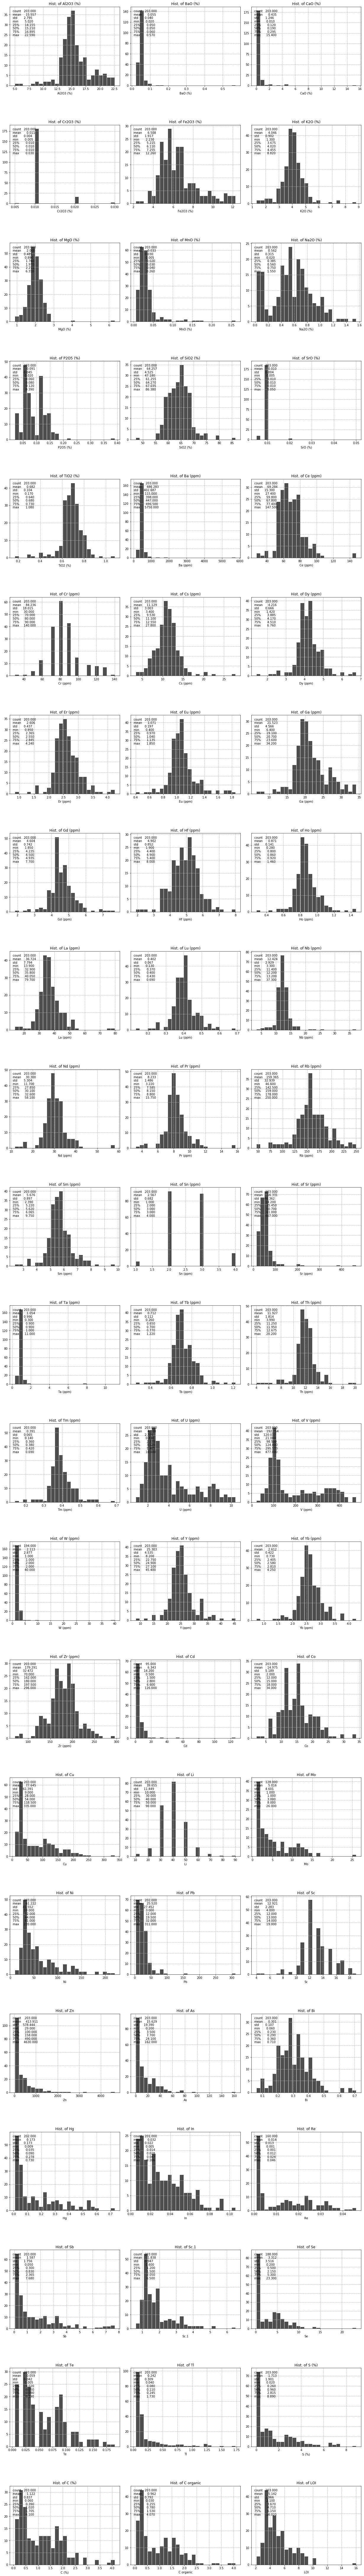

In [17]:
#choose which variable list to histogram plots:

variables = numerics


#multiplot paramters, just enter desired columns. rows will be calculated automatically
ncolumns = 3
nrows = math.ceil(len(variables)/ncolumns)

# arange scale of the x-axis 
xscale = 'linear'

# And the bins acording to x-axis scale. Change the bin values if it is needed
if xscale == 'log':
    bins = np.logspace(np.log10(0.000001),np.log10(10000.0), 50)
else:
    bins = 25

#Plot the graphs

f, axes = plt.subplots(nrows,ncolumns)

for i, variable in enumerate(variables):
    rmin = data_clean.describe(include = 'all').T['min'][variable] #minimum range in histogram
    rmax = data_clean.describe(include = 'all').T['max'][variable] #minimum range in histogram
    #or explicitly type below
    #rmin = 0.0001
    #rmax = 20
    ax=plt.subplot(nrows,ncolumns,i+1)
    plt.hist(data_clean[variable], bins = bins , edgecolor='white', range =(rmin,rmax), color = "0.3")
    #Anchored text is to plot descriptive stats into graph.
    anchored_text = AnchoredText(data_clean[variable].describe().to_string(), loc=2, frameon=False, pad = 0.5)
    ax.add_artist(anchored_text)
    ax.grid(axis = 'both', linestyle = '--', linewidth = 1)
    plt.xlabel(variable)
    plt.xscale(xscale)
    plt.title('Hist. of ' + str(variable))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.75, top=30, wspace=0.1, hspace=0.5)

#Activate the below code if output is wanted. Choose the desired format output. If EMF is desired activate 2nd line
#plt.savefig('test.svg', format = 'svg', bbox_inches = 'tight')
#plot_as_emf(f, filename="Output.emf")

C:\Users\icevik\AppData\Local\Continuum\anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\icevik\AppData\Local\Continuum\anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


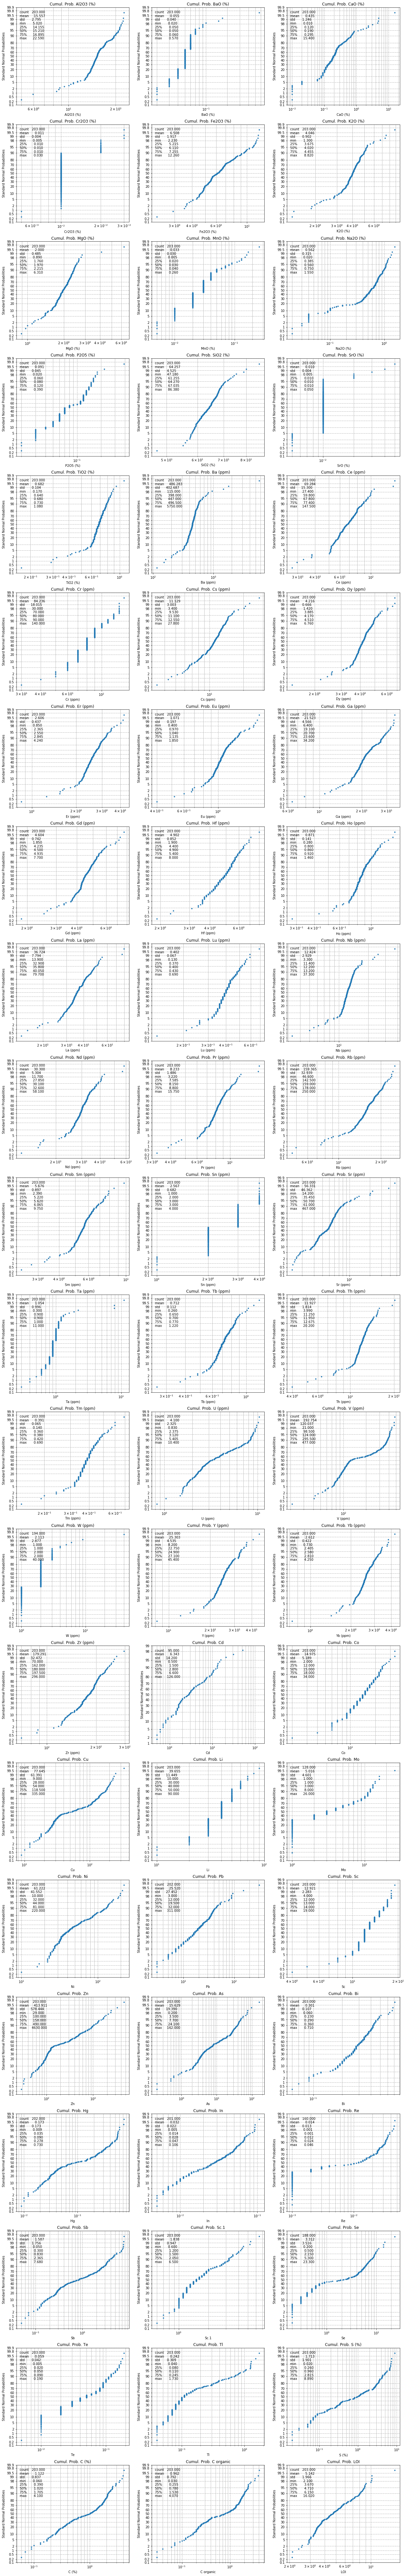

In [18]:
#choose which variable list to histogram plots:

variables = numerics


#multiplot paramters, just enter desired columns. rows will be calculated automatically
ncolumns = 3
nrows = math.ceil(len(variables)/ncolumns)

# arange scale of the x-axis 
xscale = 'log'

# And the bins acording to x-axis scale. Change the bin values if it is needed
if xscale == 'log':
    bins = np.logspace(np.log10(0.000001),np.log10(10000.0), 50)
else:
    bins = 25

#Plot the graphs

f, axes = plt.subplots(nrows,ncolumns)

for i, variable in enumerate(variables):
    rmin = data_clean.describe(include = 'all').T['min'][variable] #minimum range in histogram
    rmax = data_clean.describe(include = 'all').T['max'][variable] #minimum range in histogram
    #or explicitly type below
    #rmin = 0.0001
    #rmax = 20
    ax=plt.subplot(nrows,ncolumns,i+1)
    var_data = data_clean.dropna(subset=[variable])[variable]
    probscale.probplot(var_data, plottype='prob',
                         problabel='Standard Normal Probabilities',  probax = 'y', datalabel = variable, scatter_kws = dict(marker='.', linestyle = 'none'))
    #Anchored text is to plot descriptive stats into graph.
    anchored_text = AnchoredText(var_data.describe().to_string(), loc=2, frameon=False, pad = 0.5)
    ax.add_artist(anchored_text)
    ax.grid(axis = 'both', linestyle = '--', linewidth = 1)
    plt.xlabel(variable)
    plt.xscale(xscale)
    plt.grid(True,which="both")
    plt.title('Cumul. Prob. ' + str(variable))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.75, top=1.25 * nrows, wspace=0.2, hspace=0.2)

#Activate the below code if output is wanted. Choose the desired format output. If EMF is desired activate 2nd line
#plt.savefig('test.svg', format = 'svg', bbox_inches = 'tight')
#plot_as_emf(f, filename="Output.emf")

In [19]:
data_clean.columns

Index(['Source', 'Year', 'Sample', 'UTM_X', 'Random_X', 'UTM_Y', 'Random_Y',
       'UTM_Z', 'Z_True', 'Region', 'Occurrence', 'Section', 'Hole ID',
       'Depth', 'Unit', 'UNIT WITH SDG G', 'Lithofacies', 'Orebody',
       'Al2O3 (%)', 'BaO (%)', 'CaO (%)', 'Cr2O3 (%)', 'Fe2O3 (%)', 'K2O (%)',
       'MgO (%)', 'MnO (%)', 'Na2O (%)', 'P2O5 (%)', 'SiO2 (%)', 'SrO (%)',
       'TiO2 (%)', 'Ba (ppm)', 'Ce (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Dy (ppm)',
       'Er (ppm)', 'Eu (ppm)', 'Ga (ppm)', 'Gd (ppm)', 'Hf (ppm)', 'Ho (ppm)',
       'La (ppm)', 'Lu (ppm)', 'Nb (ppm)', 'Nd (ppm)', 'Pr (ppm)', 'Rb (ppm)',
       'Sm (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Ta (ppm)', 'Tb (ppm)', 'Th (ppm)',
       'Tm (ppm)', 'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)', 'Yb (ppm)',
       'Zr (ppm)', 'Cd', 'Co', 'Cu', 'Li', 'Mo', 'Ni', 'Pb', 'Sc', 'Zn', 'As',
       'Bi', 'Hg', 'In', 'Re', 'Sb', 'Sc.1', 'Se', 'Te', 'Tl', 'S (%)',
       'C (%)', 'C organic', 'LOI'],
      dtype='object')

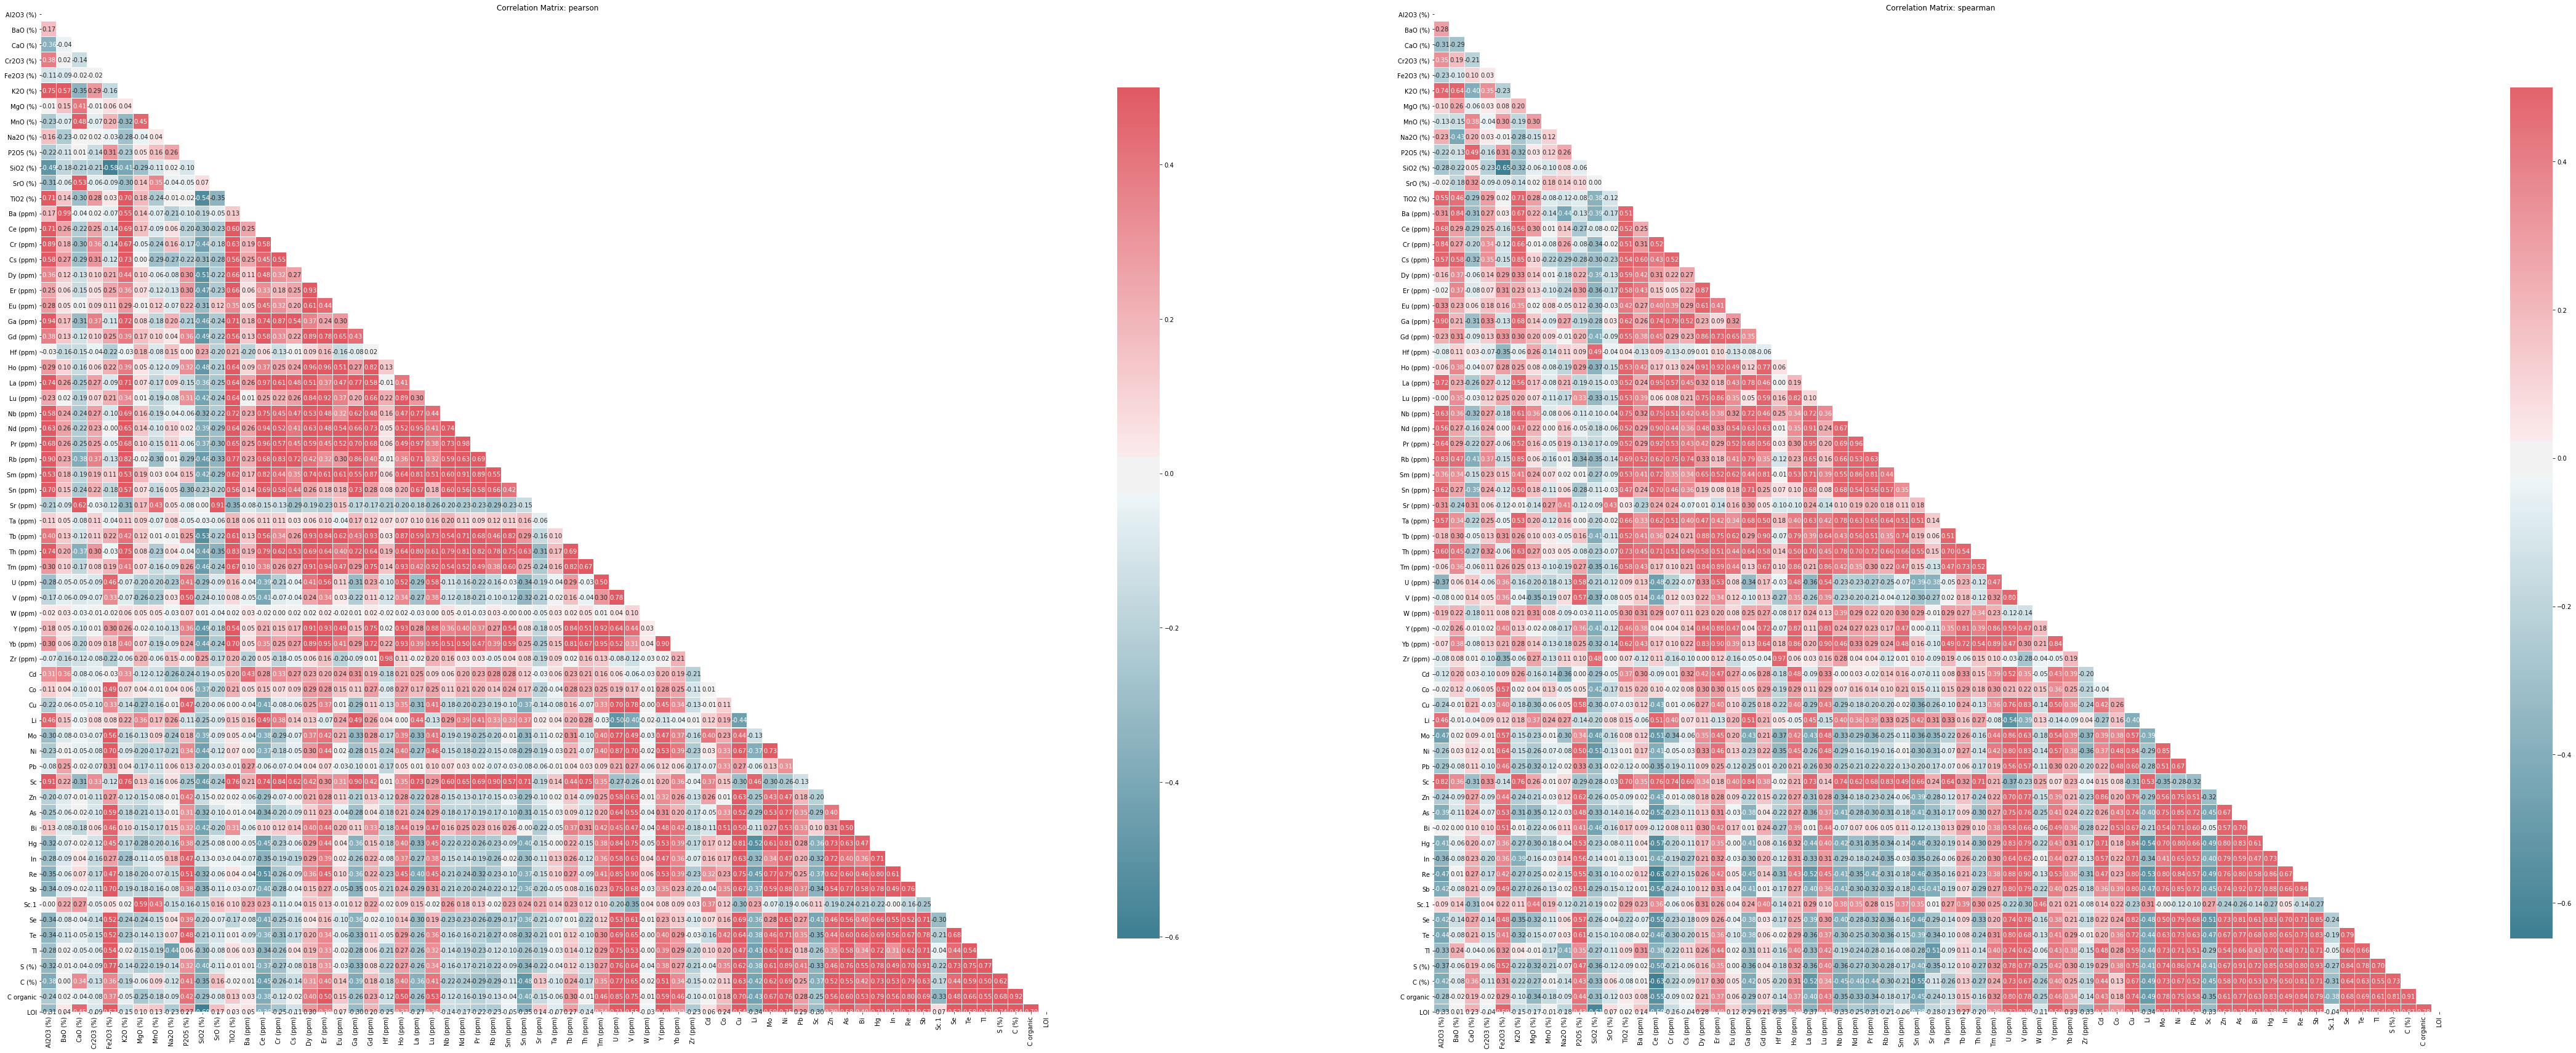

In [20]:
methods = ['pearson','spearman']

#Choose which methods to show in correlation matrix

variables = methods

#multiplot paramters, just enter desired columns. rows will be calculated.
ncolumns = 2
nrows = math.ceil(len(variables)/ncolumns)

#Plot the graphs

f, axes = plt.subplots(nrows,ncolumns)

for i, variable in enumerate(variables):
    ax=plt.subplot(nrows,ncolumns,i+1)
    Corr = data_clean.corr(method=variable, min_periods=10)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(Corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(Corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.8}, annot=True, fmt='.2f')
    plt.title('Correlation Matrix: ' + str(variable))
    #To force to show every label in X axis. Normally this does not needed. I do not know why it does not show all without this.I will find out later.
    ax.set_xticks(np.arange(len(data_clean.select_dtypes(include=['float64']).columns))+0.5)
    ax.set_xticklabels(data_clean.select_dtypes(include=['float64']).columns)
    ax.set_yticks(np.arange(len(data_clean.select_dtypes(include=['float64']).columns))+0.5)
    ax.set_yticklabels(data_clean.select_dtypes(include=['float64']).columns)
    
    
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=10, top=6, wspace=0.1, hspace=0.5)

#Activate the below code if output is wanted. Choose the desired format output. If EMF is desired activate 2nd line
#plt.savefig('test.svg', format = 'svg', bbox_inches = 'tight')
#plot_as_emf(f, filename="Output.emf")

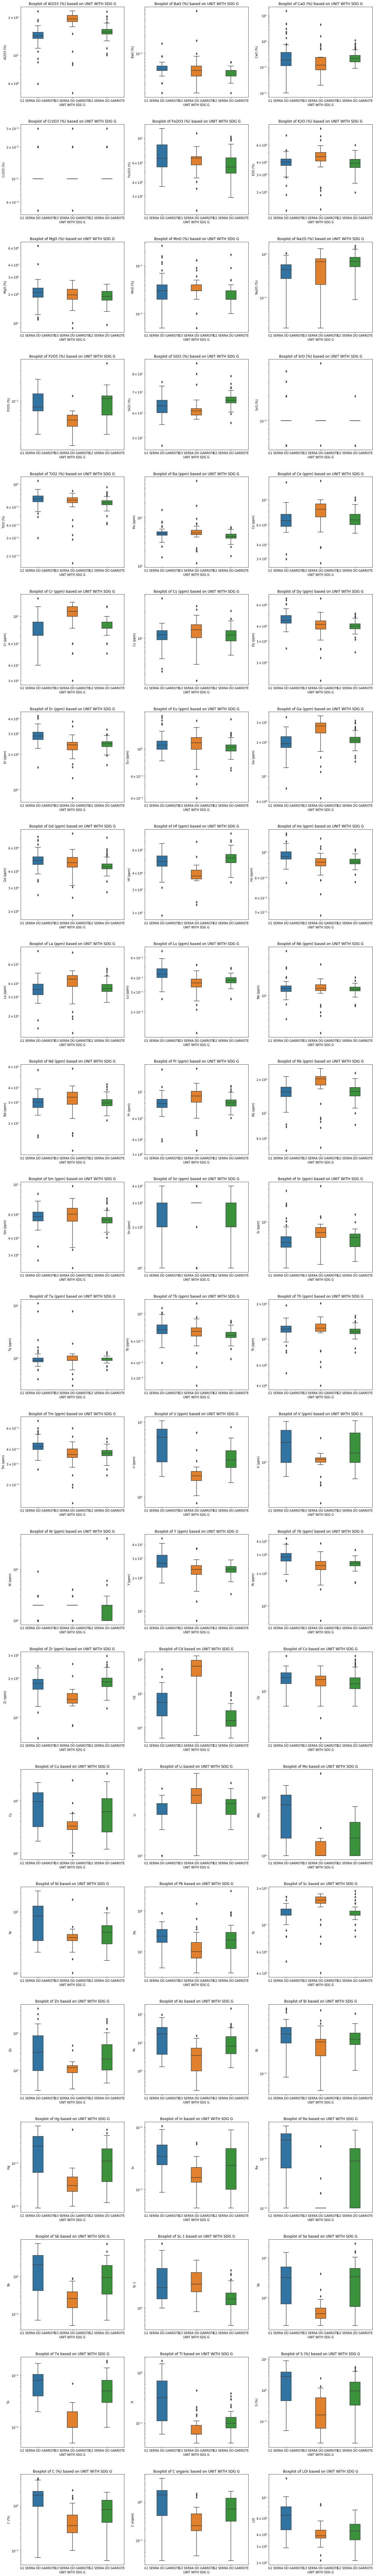

In [21]:
#choose which variable list to plot:
variables = numerics
x = 'UNIT WITH SDG G'

#multiplot paramters, just enter desired columns. rows will be calculated automatically
ncolumns = 3
nrows = math.ceil(len(variables)/ncolumns)

# arange scale of the y-axis 
yscale = 'log'

#Plot the graphs

f, axes = plt.subplots(nrows,ncolumns)

for i, variable in enumerate(variables):
    ax=plt.subplot(nrows,ncolumns,i+1)
    sns.boxplot(x = x, y = variable, data = data_clean, width=0.30).set(yscale = yscale)
    plt.title('Boxplot of ' + str(variable) + ' based on ' + str(x))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.75, top=30, wspace=0.2, hspace=0.3)

#Activate the below code if output is wanted. Choose the desired format output. If EMF is desired activate 2nd line
#plt.savefig('test.svg', format = 'svg', bbox_inches = 'tight')
#plot_as_emf(f, filename="Output.emf")

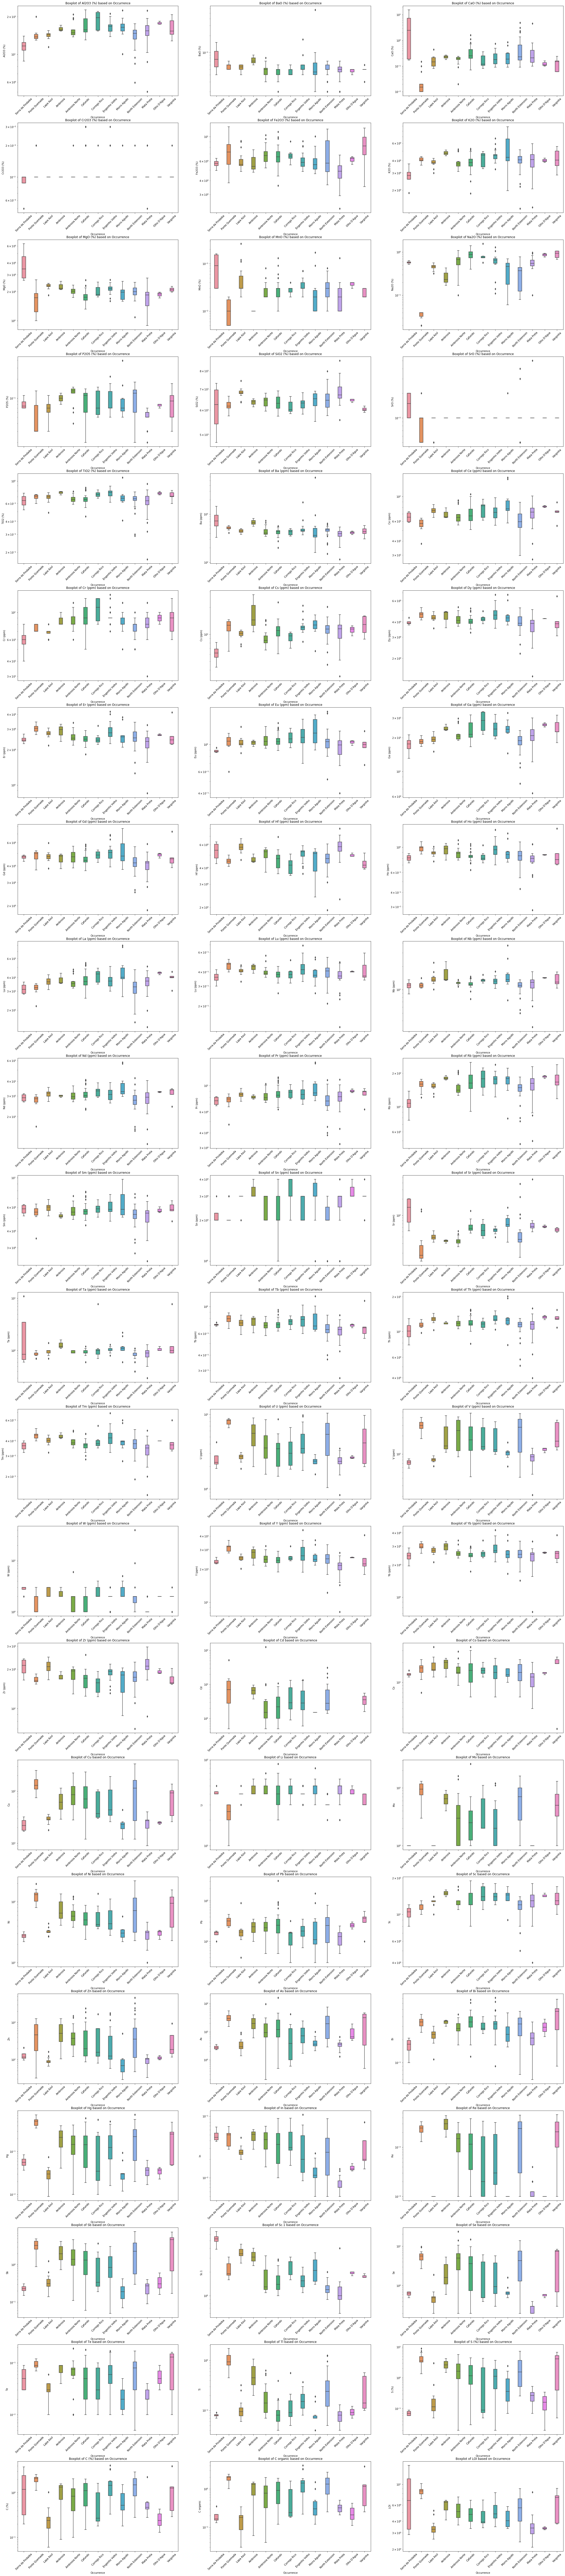

In [22]:
#choose which variable list to plot:
variables = numerics
x = 'Occurrence'

#multiplot paramters, just enter desired columns. rows will be calculated automatically
ncolumns = 3
nrows = math.ceil(len(variables)/ncolumns)

# arange scale of the y-axis 
yscale = 'log'

#Plot the graphs

f, axes = plt.subplots(nrows,ncolumns)

for i, variable in enumerate(variables):
    ax=plt.subplot(nrows,ncolumns,i+1)
    sns.boxplot(x = x, y = variable, data = data_clean, width=0.30).set(yscale = yscale)
    plt.title('Boxplot of ' + str(variable) + ' based on ' + str(x))
    plt.xticks(rotation =45)
plt.subplots_adjust(left=0.0, bottom=0.0, right=5, top=35, wspace=0.2, hspace=0.3)

#Activate the below code if output is wanted. Choose the desired format output. If EMF is desired activate 2nd line
#plt.savefig('test.svg', format = 'svg', bbox_inches = 'tight')
#plot_as_emf(f, filename="Output.emf")

##### Export CSV file to impute missing values

In [23]:
data_clean.head()

Source  Year      Sample      UTM_X   Random_X       UTM_Y    Random_Y  \
0  Fernandes  2016  VZRO032000   307100.0   308995.0   8144353.0   8144674.0   
1  Fernandes  2016  VZRO032001   307100.0   303235.0   8144353.0   8145102.0   
2  Fernandes  2016  VZRO032002   307100.0   303372.0   8144353.0   8144485.0   
3  Fernandes  2016  VZRO032003   307100.0   306161.0   8144353.0   8143607.0   
4  Fernandes  2016  VZRO032021  313393.34  305489.34  8095565.13  8095198.13   

    UTM_Z              Z_True Region         Occurrence  \
0   578.2               403.6  North  Serra da Pindaiba   
1   578.2  379.90000000000003  North  Serra da Pindaiba   
2   578.2               345.1  North  Serra da Pindaiba   
3   578.2  309.80000000000007  North  Serra da Pindaiba   
4  716.82              523.27  North      Ponte Quemada   

                     Section       Hole ID   Depth              Unit  \
0  Retiro-Pindaiba-Lapa Azul        B5GF10   174.6  Serra do Garrote   
1  Retiro-Pindaiba-Lapa Azul        B5GF10   198.3  Serra do Garrote   
2  Retiro-Pindaiba-Lapa Azul        B5GF10   233.1  Serra do Garrote   
3  Retiro-Pindaiba-Lapa Azul        B5GF10   268.4  Serra do Garrote   
4                   Ambrosia  BRVZAMDD0004  193.55  Serra do Garrote   

       UNIT WITH SDG G                        Lithofacies Orebody  Al2O3 (%)  \
0  G1 SERRA DO GARROTE                Sandstone-Siltstone     nan     13.940   
1  G1 SERRA DO GARROTE                Sandstone-Siltstone     nan     11.420   
2  G1 SERRA DO GARROTE                Sandstone-Siltstone     nan     11.890   
3  G1 SERRA DO GARROTE  Dolomitic  Argillaceous Sandstone     nan      8.820   
4  G3 SERRA DO GARROTE              Carbonaceous Phyllite     nan     19.960   

   BaO (%)  CaO (%)  Cr2O3 (%)  Fe2O3 (%)  K2O (%)  MgO (%)  MnO (%)  \
0    0.090    0.170      0.010      5.850    3.700    2.830    0.030   
1    0.060    0.190      0.010      5.620    2.830    2.630    0.030   
2    0.150    4.770      0.010      6.370    2.820    6.310    0.150   
3    0.040   15.400      0.005      4.940    1.880    4.090    0.160   
4    0.050    0.020      0.010      5.220    3.590    1.000    0.005   

   Na2O (%)  P2O5 (%)  SiO2 (%)  SrO (%)  TiO2 (%)  Ba (ppm)  Ce (ppm)  \
0     0.570     0.080    68.460    0.010     0.760   795.000    73.200   
1     0.520     0.070    73.030    0.010     0.600   645.000    70.700   
2     0.630     0.110    56.380    0.020     0.690  1455.000    59.900   
3     0.580     0.070    47.180    0.020     0.520   330.000    58.500   
4     0.020     0.120    60.710    0.010     0.600   482.000    37.800   

   Cr (ppm)  Cs (ppm)  Dy (ppm)  Er (ppm)  Eu (ppm)  Ga (ppm)  Gd (ppm)  \
0    80.000     8.120     4.340     2.720     0.940    21.200     4.750   
1    60.000     6.430     3.790     2.400     0.860    16.900     4.850   
2    60.000     5.950     3.900     2.440     0.870    18.200     4.330   
3    40.000     4.300     3.920     2.250     0.880    13.100     4.640   
4    80.000     6.910     4.610     3.460     0.600    17.800     3.740   

   Hf (ppm)  Ho (ppm)  La (ppm)  Lu (ppm)  Nb (ppm)  Nd (ppm)  Pr (ppm)  \
0     6.000     0.880    36.400     0.420    13.400    31.400     8.060   
1     6.300     0.780    33.400     0.370    11.200    30.600     7.960   
2     4.900     0.830    28.800     0.350    11.700    27.400     7.000   
3     4.300     0.730    28.100     0.300     8.800    26.700     6.770   
4     4.300     1.120    21.800     0.520    10.700    16.500     4.710   

   Rb (ppm)  Sm (ppm)  Sn (ppm)  Sr (ppm)  Ta (ppm)  Tb (ppm)  Th (ppm)  \
0   138.500     6.210     3.000    81.700     1.000     0.740    12.950   
1   106.500     6.310     2.000    51.700    11.000     0.710    10.750   
2   109.000     5.530     2.000   200.000     0.700     0.690     9.440   
3    75.900     5.190     2.000   204.000     0.600     0.710     7.670   
4   121.500     3.520     3.000   129.000     0.700     0.660    11.300   

   Tm (ppm)  U (ppm)  V (

In [24]:
data_clean.columns = data_clean.columns.str.replace("\(%\)", "")
data_clean.columns = data_clean.columns.str.replace("\(ppm\)", "")

In [25]:
data_clean.rename(columns={'UNIT WITH SDG G':'Subunit'}, inplace=True)

In [27]:
data_clean['Subunit'].unique()

array(['G1 SERRA DO GARROTE', 'G3 SERRA DO GARROTE',
       'G2 SERRA DO GARROTE'], dtype=object)

In [30]:
#Create a dictionary to format the Subunit names
dict_subunit = {
'G1 SERRA DO GARROTE':'SG1',
'G2 SERRA DO GARROTE':'SG2',
'G3 SERRA DO GARROTE':'SG3'
}

In [33]:
data_clean['Subunit'].replace(dict_subunit, inplace = True)

In [34]:
data_clean.head()

Source  Year      Sample      UTM_X   Random_X       UTM_Y    Random_Y  \
0  Fernandes  2016  VZRO032000   307100.0   308995.0   8144353.0   8144674.0   
1  Fernandes  2016  VZRO032001   307100.0   303235.0   8144353.0   8145102.0   
2  Fernandes  2016  VZRO032002   307100.0   303372.0   8144353.0   8144485.0   
3  Fernandes  2016  VZRO032003   307100.0   306161.0   8144353.0   8143607.0   
4  Fernandes  2016  VZRO032021  313393.34  305489.34  8095565.13  8095198.13   

    UTM_Z              Z_True Region         Occurrence  \
0   578.2               403.6  North  Serra da Pindaiba   
1   578.2  379.90000000000003  North  Serra da Pindaiba   
2   578.2               345.1  North  Serra da Pindaiba   
3   578.2  309.80000000000007  North  Serra da Pindaiba   
4  716.82              523.27  North      Ponte Quemada   

                     Section       Hole ID   Depth              Unit Subunit  \
0  Retiro-Pindaiba-Lapa Azul        B5GF10   174.6  Serra do Garrote     SG1   
1  Retiro-Pindaiba-Lapa Azul        B5GF10   198.3  Serra do Garrote     SG1   
2  Retiro-Pindaiba-Lapa Azul        B5GF10   233.1  Serra do Garrote     SG1   
3  Retiro-Pindaiba-Lapa Azul        B5GF10   268.4  Serra do Garrote     SG1   
4                   Ambrosia  BRVZAMDD0004  193.55  Serra do Garrote     SG3   

                         Lithofacies Orebody  Al2O3   BaO    CaO   Cr2O3   \
0                Sandstone-Siltstone     nan  13.940 0.090  0.170   0.010   
1                Sandstone-Siltstone     nan  11.420 0.060  0.190   0.010   
2                Sandstone-Siltstone     nan  11.890 0.150  4.770   0.010   
3  Dolomitic  Argillaceous Sandstone     nan   8.820 0.040 15.400   0.005   
4              Carbonaceous Phyllite     nan  19.960 0.050  0.020   0.010   

   Fe2O3   K2O   MgO   MnO   Na2O   P2O5   SiO2   SrO   TiO2       Ba     Ce   \
0   5.850 3.700 2.830 0.030  0.570  0.080 68.460 0.010  0.760  795.000 73.200   
1   5.620 2.830 2.630 0.030  0.520  0.070 73.030 0.010  0.600  645.000 70.700   
2   6.370 2.820 6.310 0.150  0.630  0.110 56.380 0.020  0.690 1455.000 59.900   
3   4.940 1.880 4.090 0.160  0.580  0.070 47.180 0.020  0.520  330.000 58.500   
4   5.220 3.590 1.000 0.005  0.020  0.120 60.710 0.010  0.600  482.000 37.800   

     Cr    Cs    Dy    Er    Eu     Ga    Gd    Hf    Ho     La    Lu     Nb   \
0 80.000 8.120 4.340 2.720 0.940 21.200 4.750 6.000 0.880 36.400 0.420 13.400   
1 60.000 6.430 3.790 2.400 0.860 16.900 4.850 6.300 0.780 33.400 0.370 11.200   
2 60.000 5.950 3.900 2.440 0.870 18.200 4.330 4.900 0.830 28.800 0.350 11.700   
3 40.000 4.300 3.920 2.250 0.880 13.100 4.640 4.300 0.730 28.100 0.300  8.800   
4 80.000 6.910 4.610 3.460 0.600 17.800 3.740 4.300 1.120 21.800 0.520 10.700   

     Nd    Pr      Rb    Sm    Sn      Sr     Ta    Tb     Th    Tm     U   \
0 31.400 8.060 138.500 6.210 3.000  81.700  1.000 0.740 12.950 0.400 4.230   
1 30.600 7.960 106.500 6.310 2.000  51.700 11.000 0.710 10.750 0.350 2.290   
2 27.400 7.000 109.000 5.530 2.000 200.000  0.700 0.690  9.440 0.380 2.230   
3 26.700 6.770  75.900 5.190 2.000 204.000  0.600 0.710  7.670 0.320 1.880   
4 16.500 4.710 121.500 3.520 3.000 129.000  0.700 0.660 11.300 0.510 7.260   

       V     W      Y    Yb      Zr   Cd     Co      Cu     Li    Mo      Ni  \
0  83.000 3.000 25.600 2.890 233.000 nan 15.000  26.000 40.000 1.000  32.000   
1  70.000 3.000 22.300 2.380 240.000 nan 13.000  18.000 40.000 1.000  27.000   
2  76.000 3.000 22.700 2.490 194.000 nan 13.000  32.000 50.000   nan  28.000   
3  58.000 2.000 23.500 1.960 165.000 nan 12.000  17.000 40.000 1.000  22.000   
4 250.000 2.000 36.600 3.190 162.000 nan  7.000 249.000 10.000 3.000 159.000   

      Pb     Sc      Zn     As    Bi    Hg    In    Re    Sb  Sc.1    Se  \
0 18.000 12.000 122.000  2.300 0.210 0.051 0.049   nan 0.220 5.300 0.500   
1 17.000 10.000 207.000  3.500 0.160 0.084 0.067   nan 0.240 3.900 0.600   
2 16.000 11.000 111.000  2.500 0.190 0.037 0.039   nan 0.150 6.500 0.700  

In [35]:
data_clean.to_csv('../02_Export/CSV/DB_SG_20191027.csv', index = False)